# Cyclistic Bikeshare Case Study:

# About Cyclistic:
Cyclistic is a bike-share company with a large footprint in Chicago. It has three pricing plans:
- single ride pass
- full-day pass
- annual pass

Customers with a single ride and all-day pass are referred to as casual riders while the ones with an annual pass are Cyclistic members.


## Deliverable: 

Cyclistic wants to understand what differentiates casual riders and annual members in order to tailor marketing strategies for converting casual riders to annual members.

In [20]:
# installation of required packages
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [21]:
# reading input files and merging them into a single dataframe
df = pd.DataFrame()
csv_files = glob.glob('..\input\*.csv')
for file in csv_files:
    df_temp = pd.read_csv(file)
    df = df.append(df_temp)

In [22]:
# exploring the dataset
print(df.dtypes)
print(df.describe())
print(df.head())

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object
          start_lat     start_lng       end_lat       end_lng
count  3.489748e+06  3.489748e+06  3.485010e+06  3.485010e+06
mean   4.190417e+01 -8.764494e+01  4.190444e+01 -8.764522e+01
std    4.364222e-02  2.575969e-02  4.373705e-02  2.589123e-02
min    4.164000e+01 -8.787000e+01  4.154000e+01 -8.807000e+01
25%    4.188224e+01 -8.765888e+01  4.188266e+01 -8.765917e+01
50%    4.190000e+01 -8.764170e+01  4.190068e+01 -8.764275e+01
75%    4.193000e+01 -8.762773e+01  4.193120e+01 -8.762775e+01
max    4.208000e+01 -8.752000e+01  4.216000e+01 -8.744000e+01
            ride_id rideable_type     

In [24]:
# converting date columns to datetime data type
df['started_at'] = pd.to_datetime(df['started_at'], format="%Y-%m-%d %H:%M:%S")
df['ended_at'] = pd.to_datetime(df['ended_at'], format = "%Y-%m-%d %H:%M:%S")

In [25]:
# dropping columns which are not required for our use case
df = df.drop(['start_lat','start_lng','end_lat','end_lng'],axis = 1)

In [26]:
# extracting year, month, day, day of week, hour of day, weekday/weekend and trip duration
df['Year'] = df['started_at'].dt.year
df['Month'] = df['started_at'].dt.month
df['Day'] = df['started_at'].dt.day
df['Day of Week'] = df['started_at'].dt.dayofweek
df['Hour of Day'] = df['started_at'].dt.hour
df['Trip Duration (minutes)'] = (df['ended_at'] - df['started_at']).astype('timedelta64[m]')
df['weekday_weekend'] = df['Day of Week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
df = df[df['Trip Duration (minutes)']>0]

   member_casual  Day of Week  Average Trip Duration  Number of Trips
0         casual            0              45.094271           149134
1         casual            1              40.545396           143307
2         casual            2              40.361552           156293
3         casual            3              43.043631           164217
4         casual            4              42.827518           205877
5         casual            5              46.939134           331678
6         casual            6              50.756877           259667
7         member            0              15.079844           263226
8         member            1              14.873805           279915
9         member            2              15.057019           300426
10        member            3              14.945307           295923
11        member            4              15.555108           301624
12        member            5              17.615412           317425
13        member    

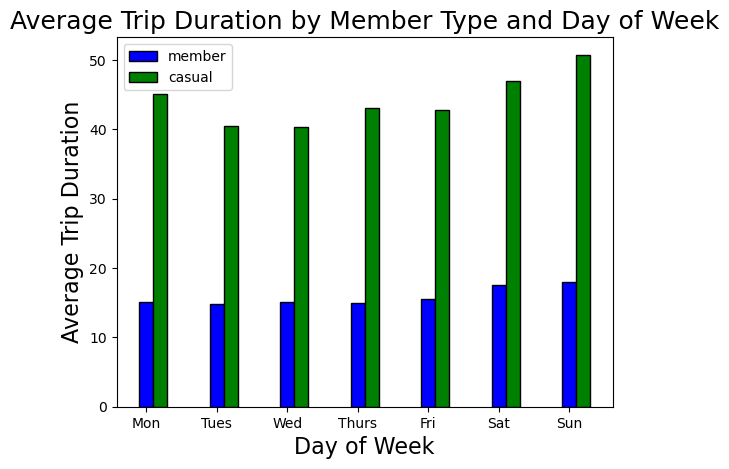

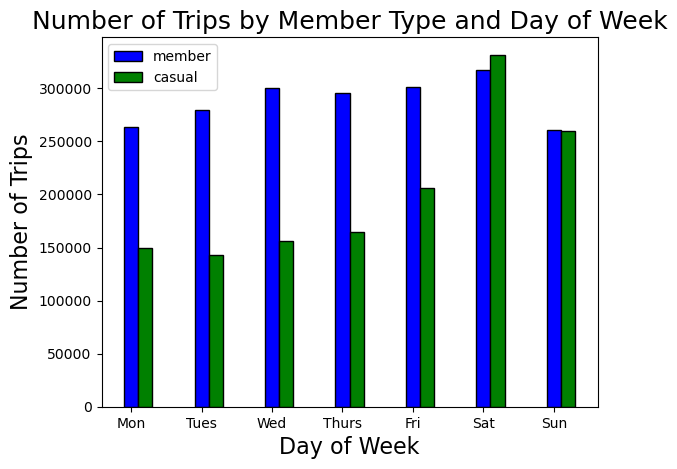

In [27]:
# average trip duration and number of trips by member type and day of the week
df_1 = df[['member_casual','Day of Week','Trip Duration (minutes)','ride_id']].groupby(['member_casual','Day of Week']).agg({'Trip Duration (minutes)':'mean','ride_id':'count'}).rename(columns = {'Trip Duration (minutes)':'Average Trip Duration','ride_id':'Number of Trips'}).reset_index()
print(df_1)
print('\n')

# plot 1
pos = np.arange(len(list(set(df_1['Day of Week']))))
bar_width = 0.2
plt.bar(pos,df_1[df_1['member_casual']=='member']['Average Trip Duration'].values,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,df_1[df_1['member_casual']=='casual']['Average Trip Duration'].values,bar_width,color='green',edgecolor='black')
plt.xticks(pos, ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.xlabel('Day of Week', fontsize=16)
plt.ylabel('Average Trip Duration', fontsize=16)
plt.title('Average Trip Duration by Member Type and Day of Week',fontsize=18)
plt.legend(list(set(df_1['member_casual'])),loc=2)
plt.show()

# plot 2
pos = np.arange(len(list(set(df_1['Day of Week']))))
bar_width = 0.2
plt.bar(pos,df_1[df_1['member_casual']=='member']['Number of Trips'].values,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,df_1[df_1['member_casual']=='casual']['Number of Trips'].values,bar_width,color='green',edgecolor='black')
plt.xticks(pos, ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])
plt.xlabel('Day of Week', fontsize=16)
plt.ylabel('Number of Trips', fontsize=16)
plt.title('Number of Trips by Member Type and Day of Week',fontsize=18)
plt.legend(list(set(df_1['member_casual'])),loc=2)
plt.show()

   member_casual  Month  Average Trip Duration  Number of Trips
0         casual      1              25.582222            17842
1         casual      2              49.699117             9964
2         casual      3              38.069527            83148
3         casual      4              73.078923            23466
4         casual      5              51.097580            86216
5         casual      6              51.587448           153319
6         casual      7              59.903829           266691
7         casual      8              45.108687           284375
8         casual      9              38.268014           226835
9         casual     10              30.314469           141922
10        casual     11              31.756532            86730
11        casual     12              26.653733            29665
12        member      1              12.565016            77573
13        member      2              17.898255            38685
14        member      3              13.

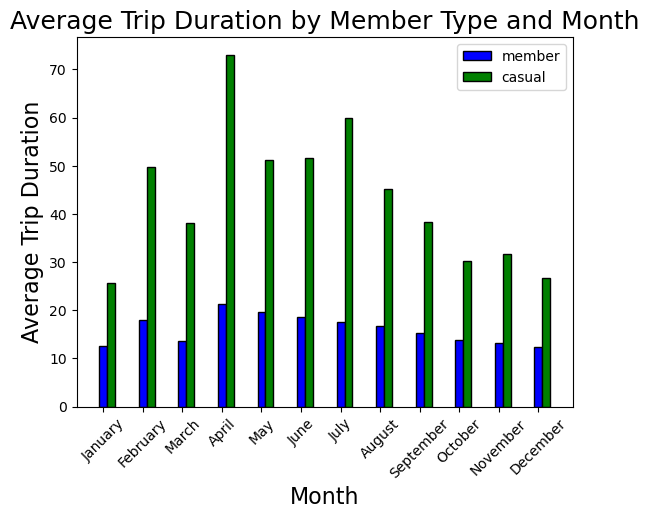

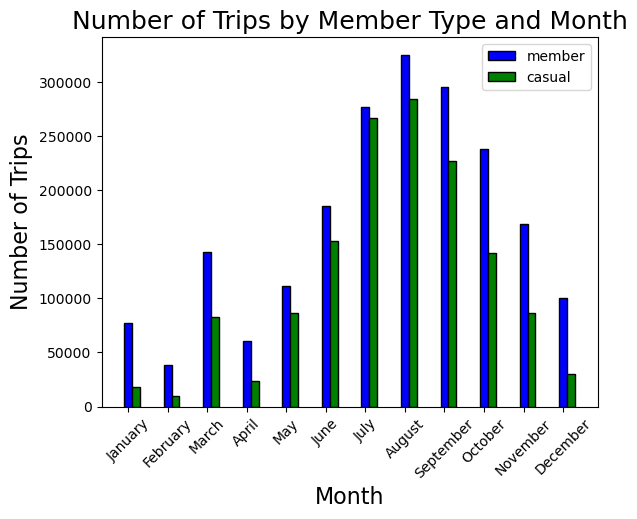

In [28]:
# average trip duration and number of trips by member type and month of year
df_1 = df[['member_casual','Month','Trip Duration (minutes)','ride_id']].groupby(['member_casual','Month']).agg({'Trip Duration (minutes)':'mean','ride_id':'count'}).rename(columns = {'Trip Duration (minutes)':'Average Trip Duration','ride_id':'Number of Trips'}).reset_index()
print(df_1)
print('\n')

# plot 1
pos = np.arange(len(list(set(df_1['Month']))))
bar_width = 0.2
plt.bar(pos,df_1[(df_1['member_casual']=='member')]['Average Trip Duration'].values,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,df_1[(df_1['member_casual']=='casual')]['Average Trip Duration'].values,bar_width,color='green',edgecolor='black')
plt.xticks(pos, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],rotation = 45)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Average Trip Duration', fontsize=16)
plt.title('Average Trip Duration by Member Type and Month',fontsize=18)
plt.legend(list(set(df_1['member_casual'])),loc=1)
plt.show()

# plot 2
pos = np.arange(len(list(set(df_1['Month']))))
bar_width = 0.2
plt.bar(pos,df_1[(df_1['member_casual']=='member')]['Number of Trips'].values,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,df_1[(df_1['member_casual']=='casual')]['Number of Trips'].values,bar_width,color='green',edgecolor='black')
plt.xticks(pos, ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],rotation = 45)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Trips', fontsize=16)
plt.title('Number of Trips by Member Type and Month',fontsize=18)
plt.legend(list(set(df_1['member_casual'])),loc=1)
plt.show()

  member_casual weekday_weekend  Average Trip Duration  Number of Trips
0        casual         Weekday              42.413612           818828
1        casual         Weekend              48.615553           591345
2        member         Weekday              15.106912          1441114
3        member         Weekend              17.806796           578145




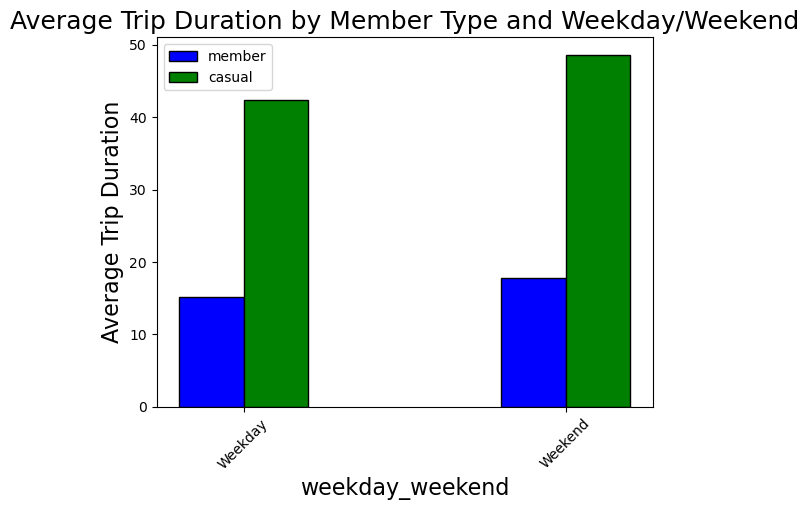

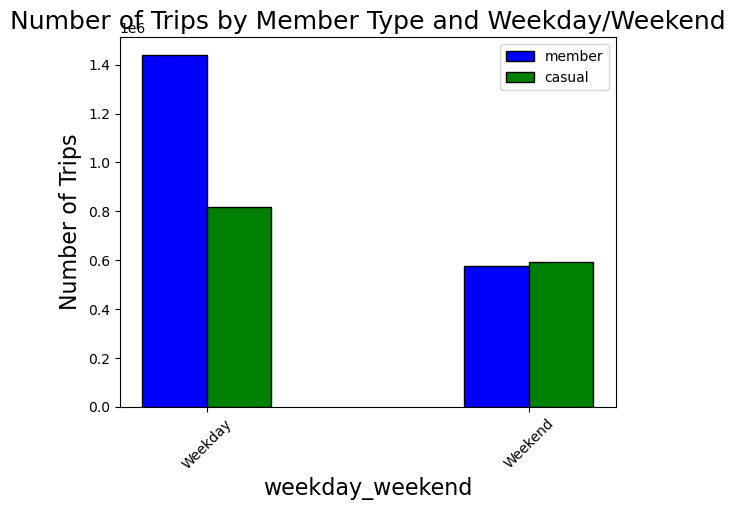

In [29]:
# average trip duration and number of trips by weekday/weekend
df_1 = df[['member_casual','weekday_weekend','Trip Duration (minutes)','ride_id']].groupby(['member_casual','weekday_weekend']).agg({'Trip Duration (minutes)':'mean','ride_id':'count'}).rename(columns = {'Trip Duration (minutes)':'Average Trip Duration','ride_id':'Number of Trips'}).reset_index()
print(df_1)
print('\n')

# plot 1
pos = np.arange(len(list(set(df_1['weekday_weekend']))))
bar_width = 0.2
plt.bar(pos,df_1[(df_1['member_casual']=='member')]['Average Trip Duration'].values,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,df_1[(df_1['member_casual']=='casual')]['Average Trip Duration'].values,bar_width,color='green',edgecolor='black')
plt.xticks(pos+0.1, ['Weekday','Weekend'],rotation = 45)
plt.xlabel('weekday_weekend', fontsize=16)
plt.ylabel('Average Trip Duration', fontsize=16)
plt.title('Average Trip Duration by Member Type and Weekday/Weekend',fontsize=18)
plt.legend(list(set(df_1['member_casual'])),loc=2)
plt.show()

# plot 2
pos = np.arange(len(list(set(df_1['weekday_weekend']))))
bar_width = 0.2
plt.bar(pos,df_1[(df_1['member_casual']=='member')]['Number of Trips'].values,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,df_1[(df_1['member_casual']=='casual')]['Number of Trips'].values,bar_width,color='green',edgecolor='black')
plt.xticks(pos+0.1, ['Weekday','Weekend'],rotation = 45)
plt.xlabel('weekday_weekend', fontsize=16)
plt.ylabel('Number of Trips', fontsize=16)
plt.title('Number of Trips by Member Type and Weekday/Weekend',fontsize=18)
plt.legend(list(set(df_1['member_casual'])),loc=1)
plt.show()

## Analysis: 

- Casual members tend to have a higher trip duration but have fewer number of trips compared to annual members, except on the weekends. 
- This could be because casual members can tend to be tourists and liesure riders who tend to go sightseeing or for other types of longer rides across town.
- Annual members could have more number of trips but lower durations as these could be locals commuting to work. This would also explain the lower number of trips by annual members on Sundays.
- Ridership for both casual and annual members tends to be low during winters.
- Both types of members tend to have slightly higher duration on weekends but fewer number of trips. This could be due to tourists being the majority of riders on weekends who would be out sightseeing.
- Number of trips are higher in summer but the average duration is higher during Spring. This could be because the weather is more pleasant during Spring which would incentivize people to bike rather than use their own vehicles.

## Conclusion:

Since Cyclistic wants to tailor marketing strategies for converting casual riders to annual members, given the analysis results, they can consider the following suggestions:

- Casual members tend to have longer rides more oriented towards liesure and can therefore be encouraged to convert to annual membership via incentives such as discounts for longer durations and/or weekends if they enroll for an annual membership.
- Summer discounts can be offered as part of an annual membership to lure casual riders.

Such strategies can help offset the cost of discounts and other marketing methods with the increase in annual members who tend to be more profitable for Cyclistic.